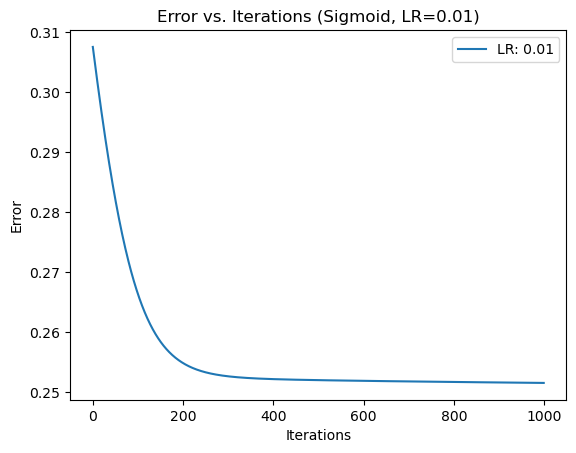

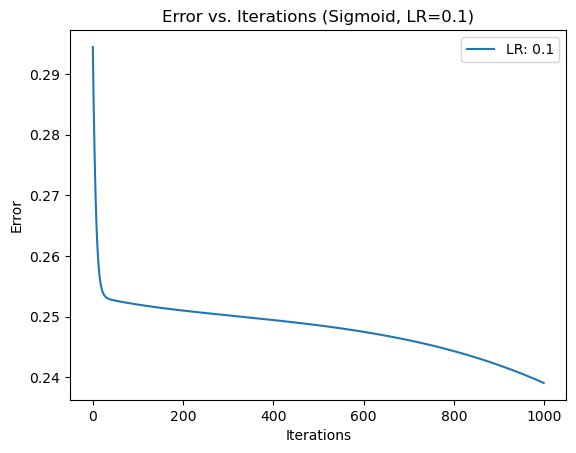

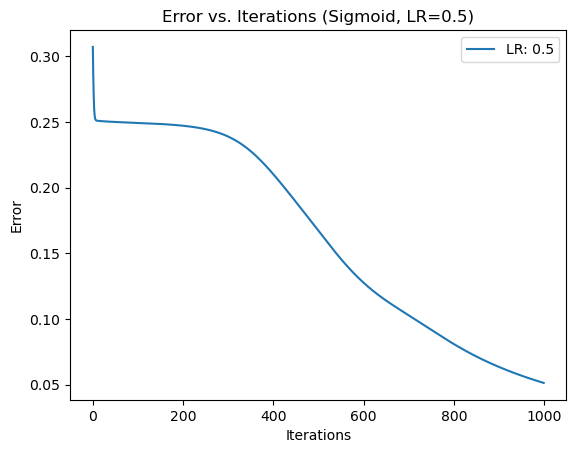

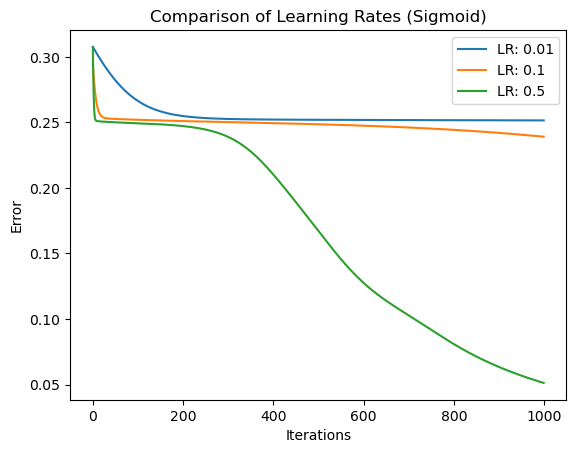

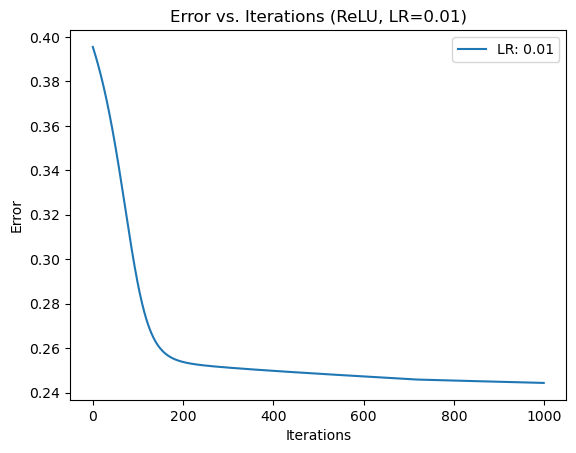

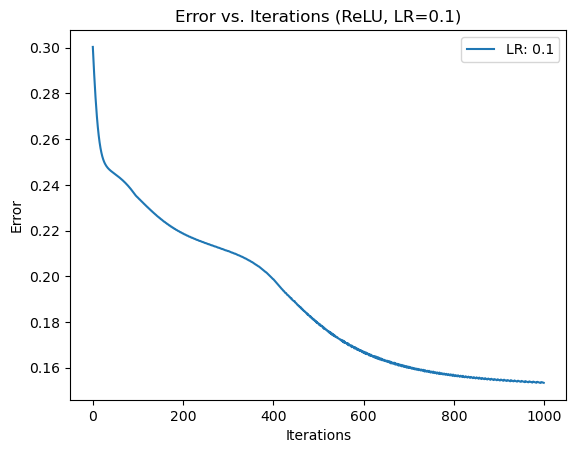

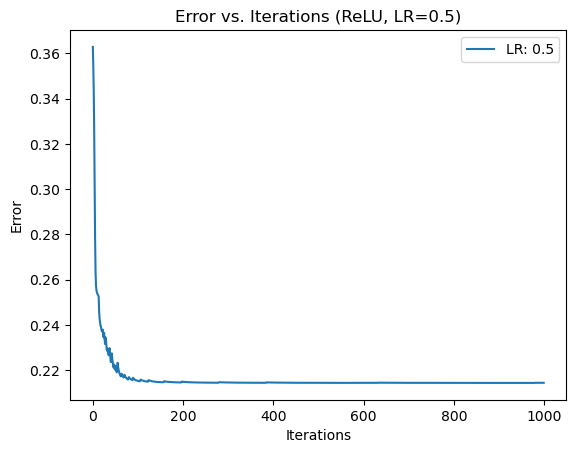

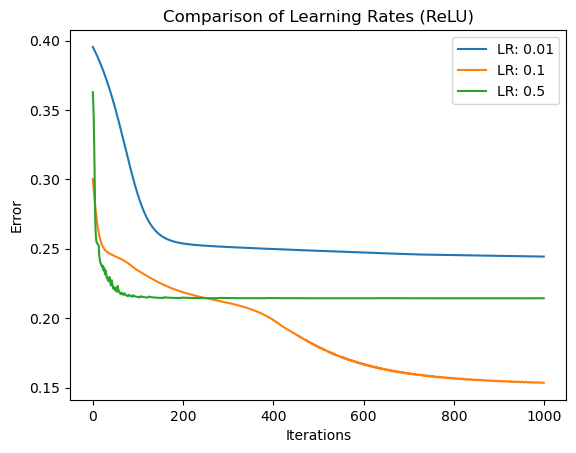

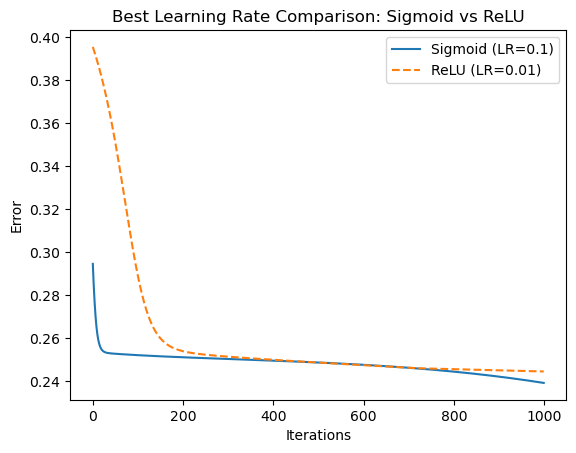

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/2022503035/Documents/machine_learning_2022503035/back propagation/INPUT_VALUES.xlsx'
df = pd.read_excel(file_path)


X = df[['X1', 'X2', 'X3']].values
y = df['O'].values.reshape(-1, 1) 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


def forward_propagation(X, W1, b1, W2, b2, activation='sigmoid'):
    Z1 = np.dot(X, W1) + b1  
    A1 = sigmoid(Z1) if activation == 'sigmoid' else relu(Z1)
    Z2 = np.dot(A1, W2) + b2  
    A2 = sigmoid(Z2)  
    return A1, A2, Z1, Z2


def backpropagate(X, y, A1, A2, Z1, Z2, W1, b1, W2, b2, learning_rate, activation='sigmoid'):
    dA2 = A2 - y
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (sigmoid_derivative(A1) if activation == 'sigmoid' else relu_derivative(Z1))
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def train_network(X, y, W1, b1, W2, b2, learning_rate, activation='sigmoid', iterations=1000):
    errors = []
    for i in range(iterations):
        A1, A2, Z1, Z2 = forward_propagation(X, W1, b1, W2, b2, activation)
        errors.append(np.mean((A2 - y) ** 2))
        W1, b1, W2, b2 = backpropagate(X, y, A1, A2, Z1, Z2, W1, b1, W2, b2, learning_rate, activation)
    return errors

learning_rates = [0.01, 0.1, 0.5]
all_errors_sigmoid = {}
all_errors_relu = {}

for lr in learning_rates:
    W1, b1, W2, b2 = np.random.randn(3, 2), np.random.randn(2), np.random.randn(2, 1), np.random.randn(1)
    all_errors_sigmoid[lr] = train_network(X, y, W1, b1, W2, b2, lr, 'sigmoid')

for lr in learning_rates:
    W1, b1, W2, b2 = np.random.randn(3, 2), np.random.randn(2), np.random.randn(2, 1), np.random.randn(1)
    all_errors_relu[lr] = train_network(X, y, W1, b1, W2, b2, lr, 'relu')

for lr in learning_rates:
    plt.figure()
    plt.plot(range(1000), all_errors_sigmoid[lr], label=f"LR: {lr}")
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(f'Error vs. Iterations (Sigmoid, LR={lr})')
    plt.legend()
    plt.show()

plt.figure()
for lr in learning_rates:
    plt.plot(range(1000), all_errors_sigmoid[lr], label=f"LR: {lr}")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Comparison of Learning Rates (Sigmoid)')
plt.legend()
plt.show()


for lr in learning_rates:
    plt.figure()
    plt.plot(range(1000), all_errors_relu[lr], label=f"LR: {lr}")
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(f'Error vs. Iterations (ReLU, LR={lr})')
    plt.legend()
    plt.show()


plt.figure()
for lr in learning_rates:
    plt.plot(range(1000), all_errors_relu[lr], label=f"LR: {lr}")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Comparison of Learning Rates (ReLU)')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1000), all_errors_sigmoid[0.1], label='Sigmoid (LR=0.1)')
plt.plot(range(1000), all_errors_relu[0.01], label='ReLU (LR=0.01)', linestyle='dashed')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Best Learning Rate Comparison: Sigmoid vs ReLU')
plt.legend()
plt.show()
